In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv('creditcard.csv')
print(df.shape)
print(df.columns)
print(df.columns.shape)
print(df.head())
print(df.info())

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(31,)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0

In [15]:
print("Remove null Valu: \n",df.isnull().sum())
df=df.dropna()
#print("Remove Duplicate Value: \n",df.duplicated().sum())

Remove null Valu: 
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [3]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [16]:
fraud=df[df['Class']==1]
valid=df[df['Class']==0]
outlierFractions=len(fraud)/float(len(valid))
print(outlierFractions)
print("Fraud Case: {}".format(len(df[df['Class']==1])))
print("Valid case: {}".format(len(df[df['Class']==0])))

0.0017304750013189597
Fraud Case: 492
Valid case: 284315


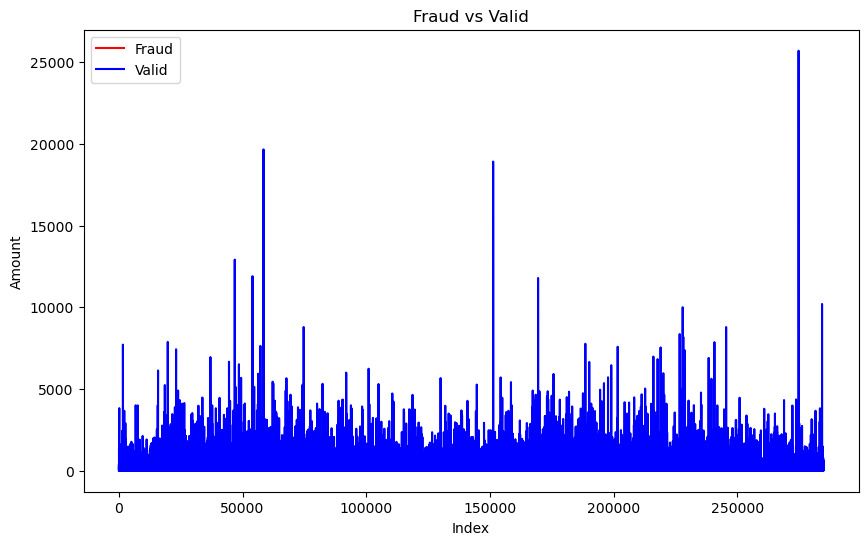

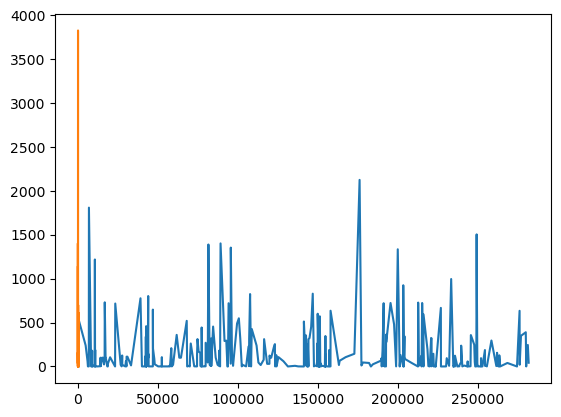

In [24]:
import matplotlib.pyplot as plt

# Ek column choose karo
fraud_col = fraud['Amount']   # fraud ka 'Amount' column
valid_col = valid['Amount']   # valid ka 'Amount' column

plt.figure(figsize=(10,6))
plt.plot(fraud_col, label='Fraud', color='r')   # red line
plt.plot(valid_col, label='Valid', color='b')   # blue line
plt.xlabel("Index")
plt.ylabel("Amount")
plt.title("Fraud vs Valid")
plt.legend()  # legend show kare
plt.show()

min_len = min(len(fraud_col), len(valid_col))
plt.plot(fraud_col[:min_len], label='Fraud')
plt.plot(valid_col[:min_len], label='Valid')


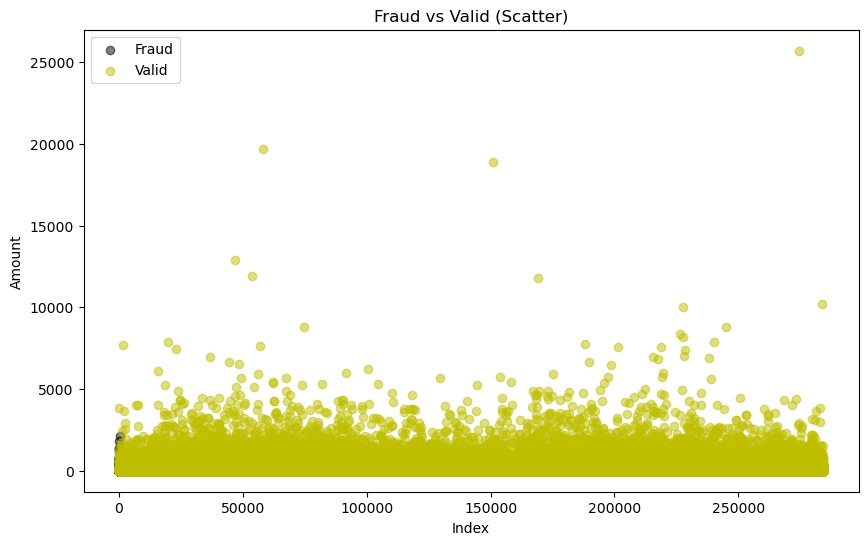

In [27]:
import matplotlib.pyplot as plt

# Ek column choose karo (numeric column)
fraud_col = fraud['Amount']
valid_col = valid['Amount']

plt.figure(figsize=(10,6))

# Fraud points
plt.scatter(range(len(fraud_col)), fraud_col, color='black', alpha=0.5, label='Fraud')

# Valid points
plt.scatter(range(len(valid_col)), valid_col, color='y', alpha=0.5, label='Valid')

plt.xlabel("Index")
plt.ylabel("Amount")
plt.title("Fraud vs Valid (Scatter)")
plt.legend()
plt.show()


In [28]:
print("Amount details of the fraudulent transaction:")
print(fraud.Amount.describe())
print("------------------------------------------------------------")
print("Details of valid Transaction")
print(valid.Amount.describe())

Amount details of the fraudulent transaction:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
------------------------------------------------------------
Details of valid Transaction
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


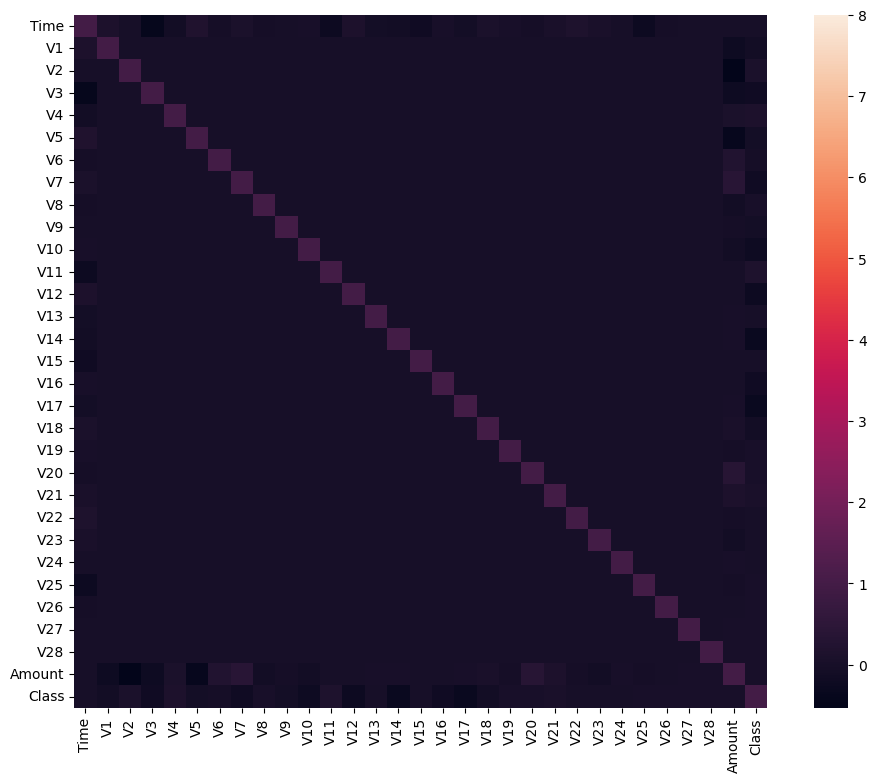

In [35]:
corrmat=df.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=8, square=True)
plt.show()

In [44]:
X=df.drop(['Class'],axis=1)
y=df['Class']
print(X.shape)
print(y.shape)

xdata=X.values
ydata=y.values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)


(284807, 30)
(284807,)


In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred=rfc.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred)
recall = recall_score(y_test, ypred)
f1 = f1_score(y_test, ypred)
mcc = matthews_corrcoef(y_test, ypred)

print("Model Evaluation Metrics: ")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(y_test, ypred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal','Fraud'], yticklabels=['Normal','Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Prediction Class")
plt.ylabel("True Class")
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [56962, 227845]